# Предсказание факта задержки авиарейса

## 1. Описание задачи

Необходимо предсказать факт задержки авиарейса, основываясь на входных данных из датасета (https://www.kaggle.com/threnjen/2019-airline-delays-and-cancellations?select=new_data_small.csv)

## 2. Описание данных

Датасет состоит из 26 столбцов.

1. MONTH - номер месяца, когда происходил рейс. (В нашем варианте датасета MONTH == 1 для всех записей)
1. DAY_OF_WEEK - номер дня недели, когда происходил рейс.
1. DEP_DEL15 - факт задержки авиарейса (А именно, =1, когда задержка превысила 15 минут)
1. DISTANCE_GROUP - turbulence group, от этого значения зависят минимальные расстояния между самолетами.
1. DEP_BLOCK - время вылета рейса (утро/день/вечер и т.д.)
1. SEGMENT_NUMBER - число сегментов рейса.
1. CONCURRENT_FLIGHTS - число вылетов из того же аэропорта в то же время вылета (dep_block). 
1. NUMBER_OF_SEATS - число сидений в самолете.
1. CARRIER_NAME - авиакомпания.
1. AIRPORT_FLIGHTS_MONTH - среднее число взлетов с этого аэропорта в месяц.
1. AIRLINE_FLIGHTS_MONTH - среднее число рейсов авивкомпании в месяц.
1. AIRLINE_AIRPORT_FLIGHTS_MONTH - среднее число рейсов этой авиакомпании, начинавшихся с этого аэропорта, в месяц
1. AVG_MONTHLY_PASS_AIRPORT - среднее число пассажиров аэропорта в месяц.
1. AVG_MONTHLY_PASS_AIRLINE - среднее число пассажиров авиакомпании в месяц.
1. FLT_ATTENDANTS_PER_PASS - число стюардесс авиакомпании, деленное на число пассажиров авиакомпании.
1. GROUND_SERV_PER_PASS - число сотрудников наземной службы авиакомпании, деленное на число пассажиров авиакомпании.
1. PLANE_AGE - возраст самолета.
1. DEPARTING_AIRPORT - название аэропорта, где начинается авиарейс.
1. LATITUDE - широта аэропорта вылета.
1. LONGITUDE - долгота аэропорта вылета.
1. PREVIOUS_AIRPORT - прошлый аэропорт, из которого прилетел самолет.
1. PRCP - дюймы выпавших осадков за день.
1. SNOW - дюймы выпавшего снега за день.
1. SNWD - дюймы снега на земле.
1. TMAX - максимальная температура за день.
1. AWND - максимальная скорость ветра за день.

In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
# Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
from sklearn import ensemble

In [2]:
# Датасет оказался слишком большим, возьмем пробу размером в 20% от датасета, чтобы все работало
import random

random.seed(1)
filename = "new_data_small.csv" 
n = sum(1 for line in open(filename))-1  
s = n//5 
skip = sorted(random.sample(range(1, n+1), n-s))   
data = pd.read_csv(filename, skiprows=skip)

In [3]:
# Посмотрим на размеры нашего датасета
data.shape

(99787, 26)

In [4]:
# Посмотрим на примеры данных
data.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,1,0,1,EARLY_MORNING,1,8,99,American Airlines Inc.,5021,...,11,Raleigh-Durham International,35.875,-78.782,NONE,0.46,0.0,0.0,67.0,5.37
1,1,1,0,3,MORNING,1,49,143,Southwest Airlines Co.,5021,...,12,Raleigh-Durham International,35.875,-78.782,NONE,0.46,0.0,0.0,67.0,5.37
2,1,1,0,2,MORNING,1,49,143,Southwest Airlines Co.,5021,...,14,Raleigh-Durham International,35.875,-78.782,NONE,0.46,0.0,0.0,67.0,5.37
3,1,1,0,2,MORNING,1,49,191,Delta Air Lines Inc.,5021,...,1,Raleigh-Durham International,35.875,-78.782,NONE,0.46,0.0,0.0,67.0,5.37
4,1,1,0,10,MORNING,1,49,142,United Air Lines Inc.,5021,...,24,Raleigh-Durham International,35.875,-78.782,NONE,0.46,0.0,0.0,67.0,5.37


In [5]:
data.tail()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
99782,1,2,0,1,AFTERNOON,5,27,123,Hawaiian Airlines Inc.,2383,...,18,Kahului Airport,20.901,-156.434,Lihue Airport,0.0,0.0,0.0,82.0,4.47
99783,1,2,0,1,AFTERNOON,6,27,123,Hawaiian Airlines Inc.,2383,...,16,Kahului Airport,20.901,-156.434,Honolulu International,0.0,0.0,0.0,82.0,4.47
99784,1,2,0,1,EVENING,8,11,175,Southwest Airlines Co.,2383,...,7,Kahului Airport,20.901,-156.434,Honolulu International,0.0,0.0,0.0,82.0,4.47
99785,1,2,0,1,EVENING,11,11,123,Hawaiian Airlines Inc.,2383,...,18,Kahului Airport,20.901,-156.434,Honolulu International,0.0,0.0,0.0,82.0,4.47
99786,1,2,0,1,LATE_NIGHT,13,11,123,Hawaiian Airlines Inc.,2383,...,15,Kahului Airport,20.901,-156.434,Honolulu International,0.0,0.0,0.0,82.0,4.47


In [6]:
# Посмотрим на столбцы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99787 entries, 0 to 99786
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MONTH                          99787 non-null  int64  
 1   DAY_OF_WEEK                    99787 non-null  int64  
 2   DEP_DEL15                      99787 non-null  int64  
 3   DISTANCE_GROUP                 99787 non-null  int64  
 4   DEP_BLOCK                      99787 non-null  object 
 5   SEGMENT_NUMBER                 99787 non-null  int64  
 6   CONCURRENT_FLIGHTS             99787 non-null  int64  
 7   NUMBER_OF_SEATS                99787 non-null  int64  
 8   CARRIER_NAME                   99787 non-null  object 
 9   AIRPORT_FLIGHTS_MONTH          99787 non-null  int64  
 10  AIRLINE_FLIGHTS_MONTH          99787 non-null  int64  
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  99787 non-null  int64  
 12  AVG_MONTHLY_PASS_AIRPORT       99787 non-null 

## 3. Визуализация данных

In [7]:
# Вычислим некоторые основные характеристики
data.describe()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
count,99787.0,99787.000000,99787.000000,99787.000000,99787.000000,99787.000000,99787.000000,99787.000000,99787.000000,99787.000000,...,99787.000000,99787.000000,99787.000000,99787.000000,99787.000000,99787.000000,99787.000000,99787.000000,99787.000000,99787.000000
mean,1.0,3.945253,0.136370,3.826691,2.981691,89.115706,134.025584,12471.849179,60835.987794,3328.140980,...,0.000508,0.000705,11.264553,36.272521,-95.167130,0.085095,0.045558,0.144064,56.403888,8.216034
std,0.0,1.910479,0.343183,2.346472,1.718247,65.595351,47.043361,8542.500250,32997.274049,4091.431878,...,0.000458,0.000258,7.082663,5.621434,18.179088,0.239373,0.297087,0.786464,14.971254,4.009754
min,1.0,1.000000,0.000000,1.000000,1.000000,1.000000,44.000000,1103.000000,7018.000000,1.000000,...,0.000000,0.000033,0.000000,18.440000,-159.346000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,2.000000,0.000000,2.000000,2.000000,35.000000,90.000000,5019.000000,24691.000000,636.000000,...,0.000170,0.000541,5.000000,32.894000,-111.967000,0.000000,0.000000,0.000000,45.000000,5.140000
50%,1.0,4.000000,0.000000,3.000000,3.000000,77.000000,143.000000,11479.000000,69699.000000,2084.000000,...,0.000338,0.000616,12.000000,36.127000,-87.906000,0.000000,0.000000,0.000000,57.000000,7.380000
75%,1.0,5.000000,0.000000,5.000000,4.000000,124.000000,173.000000,17680.000000,80026.000000,4681.000000,...,0.000768,0.000911,17.000000,40.639000,-80.936000,0.020000,0.000000,0.000000,67.000000,10.510000
max,1.0,7.000000,1.000000,11.000000,14.000000,286.000000,337.000000,32102.000000,107849.000000,19461.000000,...,0.001759,0.001265,32.000000,61.169000,-66.002000,3.020000,7.000000,14.200000,88.000000,25.050000


In [8]:
# Признак MONTH нам не нужен, он всегда равен 1 в наших данных
data = data.drop(['MONTH'], axis=1)

In [9]:
# Признаков много, матрица корреляций получилась большой
corr_mat = data.corr()
corr_mat

,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,...,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
DAY_OF_WEEK,1.000000,0.061430,0.016358,-0.021220,-0.034383,0.010812,-0.001412,-0.009436,-0.004426,0.003136,...,0.003553,0.006260,-0.010801,-0.013630,-0.004898,0.071153,0.039054,-0.006333,0.068227,0.105956
DEP_DEL15,0.061430,1.000000,0.017365,0.065824,0.012275,-0.012686,0.019616,-0.027097,0.004637,0.020905,...,-0.009215,-0.014864,0.004572,0.007900,0.007408,0.073018,0.032834,0.009263,0.001597,0.046983
DISTANCE_GROUP,0.016358,0.017365,1.000000,-0.249965,-0.017784,0.448757,-0.018827,-0.020369,-0.038249,0.030567,...,0.180280,0.281252,-0.115353,-0.026651,-0.144886,-0.028198,-0.011623,-0.012148,0.077477,0.010374
SEGMENT_NUMBER,-0.021220,0.065824,-0.249965,1.000000,0.014737,-0.218169,0.053988,0.024677,0.056481,0.037048,...,-0.105771,-0.192885,0.072031,-0.025521,-0.070381,-0.015063,-0.019666,-0.005675,-0.003120,-0.048348
CONCURRENT_FLIGHTS,-0.034383,0.012275,-0.017784,0.014737,1.000000,-0.026347,0.906320,-0.017723,0.589167,0.868632,...,0.137334,0.094020,0.027715,0.009419,0.118573,0.067765,-0.048464,-0.076189,-0.052229,0.041709
NUMBER_OF_SEATS,0.010812,-0.012686,0.448757,-0.218169,-0.026347,1.000000,-0.004951,0.275781,0.145603,0.060944,...,0.217990,0.361841,-0.091080,-0.160821,-0.138109,-0.018057,-0.038680,-0.044048,0.163048,-0.033717
AIRPORT_FLIGHTS_MONTH,-0.001412,0.019616,-0.018827,0.053988,0.906320,-0.004951,1.000000,-0.016413,0.658266,0.971499,...,0.140802,0.088133,0.029636,-0.013004,0.102426,0.095942,-0.042476,-0.087061,-0.033996,0.051707
AIRLINE_FLIGHTS_MONTH,-0.009436,-0.027097,-0.020369,0.024677,-0.017723,0.275781,-0.016413,1.000000,0.221537,-0.002560,...,0.003404,-0.012889,0.181320,-0.006964,-0.075143,-0.005407,-0.002641,-0.034860,0.018091,-0.081012
AIRLINE_AIRPORT_FLIGHTS_MONTH,-0.004426,0.004637,-0.038249,0.056481,0.589167,0.145603,0.658266,0.221537,1.000000,0.649947,...,0.138951,0.146270,0.112043,-0.059730,0.084771,0.122643,-0.040214,-0.063679,-0.006303,0.020392
AVG_MONTHLY_PASS_AIRPORT,0.003136,0.020905,0.030567,0.037048,0.868632,0.060944,0.971499,-0.002560,0.649947,1.000000,...,0.152823,0.103067,0.028026,-0.090793,0.055290,0.091694,-0.059067,-0.105348,0.059620,0.046926


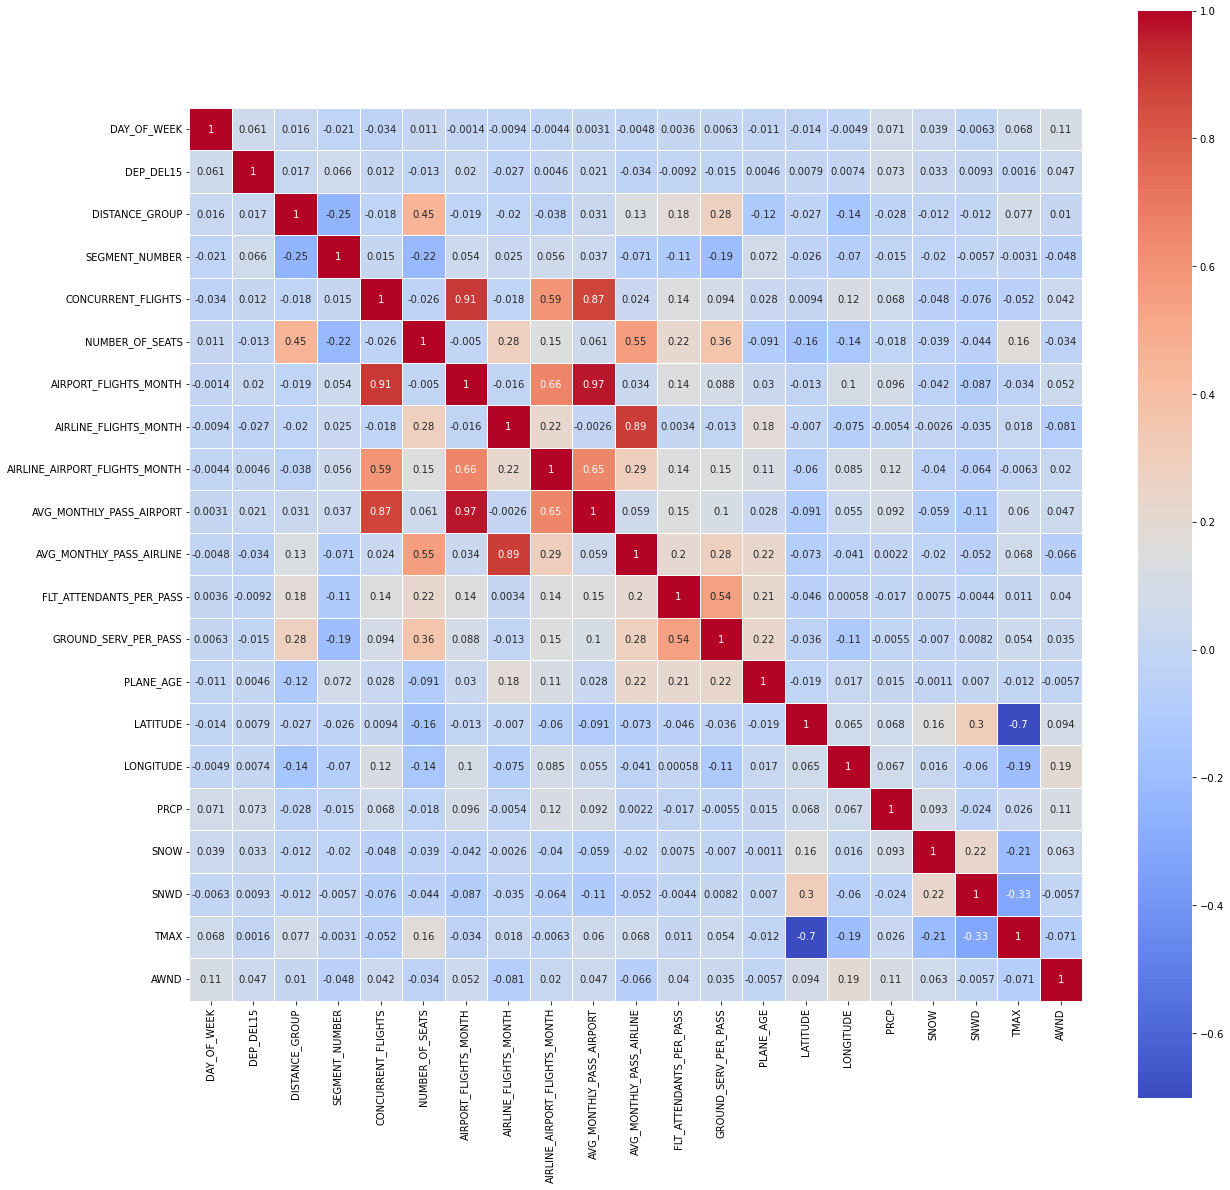

In [10]:
fig = plt.figure(figsize=(20, 20))
sns.heatmap(corr_mat, square=True, cmap='coolwarm', annot=True, linewidths=.5)
pass

Признаки AIRPORT_FLIGHTS_MONTH и AVG_MONTHLY_PASS_AIRPORT коррелируют друг с другом и с признаком CONCURRENT_FLIGHTS. Признак TMAX коррелирует с LATITUDE. У нас есть большое число параметров, слабо коррелирующих с классом объекта. С этим мы разберемся на этапе feature selection.

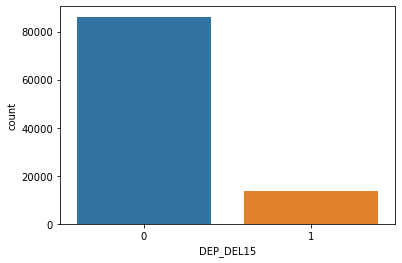

In [11]:
# Признаков много, попробуем визуализировать их поотдельности
# Сначала посмотрим соотношение полетов с задержкой к числу полетов без задержки
sns.countplot(x='DEP_DEL15', data=data)
pass

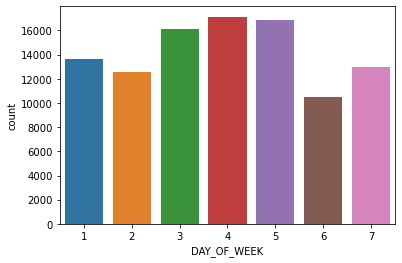

In [12]:
# Сколько полетов происходило в разные дни недели
sns.countplot(x='DAY_OF_WEEK', data=data)
pass

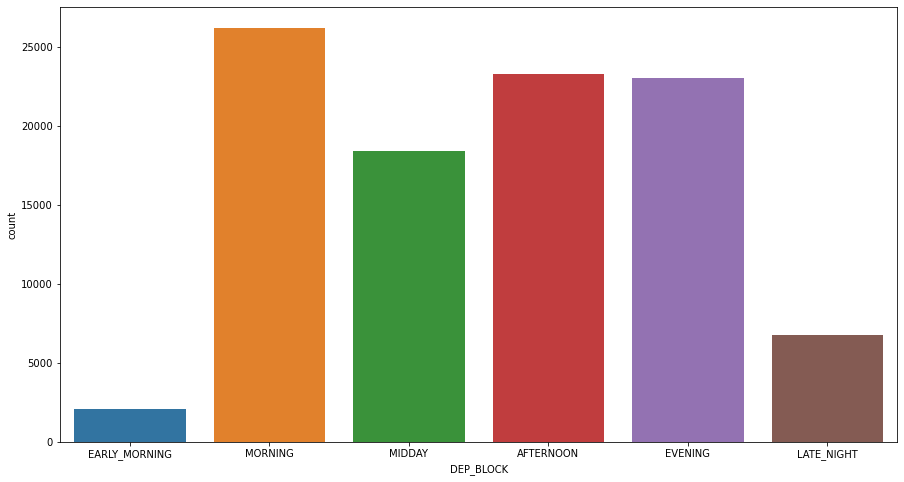

In [13]:
# Число полетов в разное время дня
order_list = ['EARLY_MORNING', 'MORNING', 'MIDDAY', 'AFTERNOON', 'EVENING', 'LATE_NIGHT']
plt.figure(figsize = (15,8))
sns.countplot(x='DEP_BLOCK', data=data, order = order_list)
pass

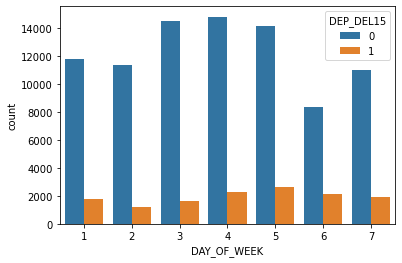

In [14]:
# Из всех признаков вероятность задержки наиболее линейно завима от дня недели и числа сегментов рейса
# Нарисуем графики 
sns.countplot(x='DAY_OF_WEEK',  hue='DEP_DEL15', data=data)
pass

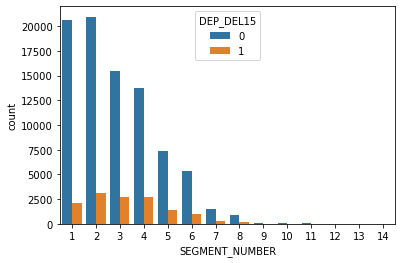

In [15]:
# Значение корреляции измеряется сотыми, графики получились не очень интересными
sns.countplot(x='SEGMENT_NUMBER',  hue='DEP_DEL15', data=data)
pass

Разберемся с выбросами

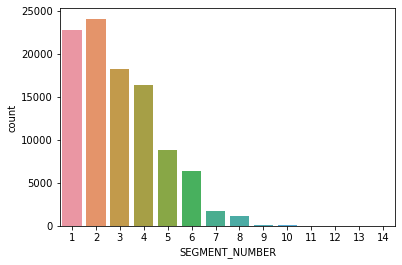

In [16]:
sns.countplot(x='SEGMENT_NUMBER', data=data)
pass
#Здесь все нормально

<Figure size 1080x576 with 0 Axes>

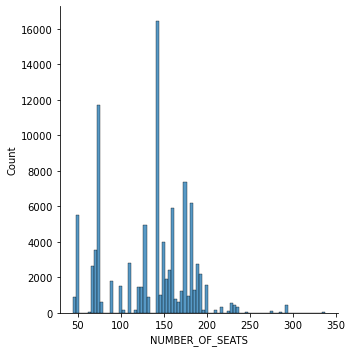

In [17]:
plt.figure(figsize = (15,8))
sns.displot(data.NUMBER_OF_SEATS)
pass
#Здесь все нормально

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


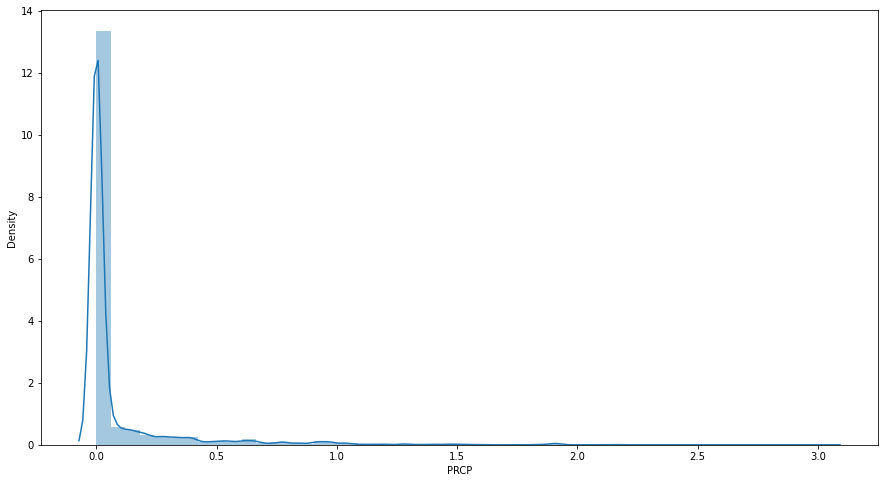

In [18]:
plt.figure(figsize = (15,8))
sns.distplot(data.PRCP)
pass

In [19]:
data['PRCP'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.00
0.010    0.00
0.050    0.00
0.100    0.00
0.500    0.00
0.900    0.28
0.950    0.58
0.990    1.19
0.995    1.49
Name: PRCP, dtype: float64

99.5% значений не превышают величины 1.49, при этом максимальные значения признака могут достигать значения 3.

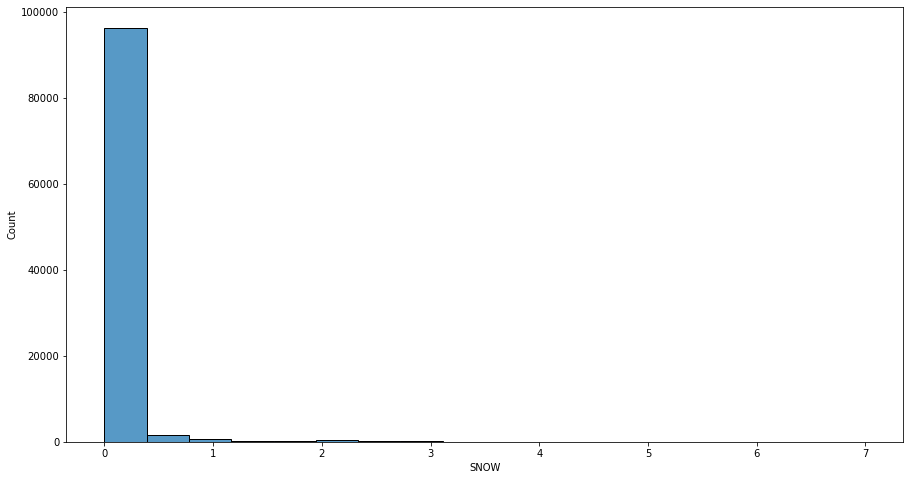

In [20]:
plt.figure(figsize = (15,8))
sns.histplot(data.SNOW)
pass

In [21]:
data['SNOW'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.0
0.010    0.0
0.050    0.0
0.100    0.0
0.500    0.0
0.900    0.0
0.950    0.0
0.990    1.6
0.995    2.1
Name: SNOW, dtype: float64

99.5% значений SNOW не превышают величины 2.1, при этом максимальные значения признака могут достигать значения 7.

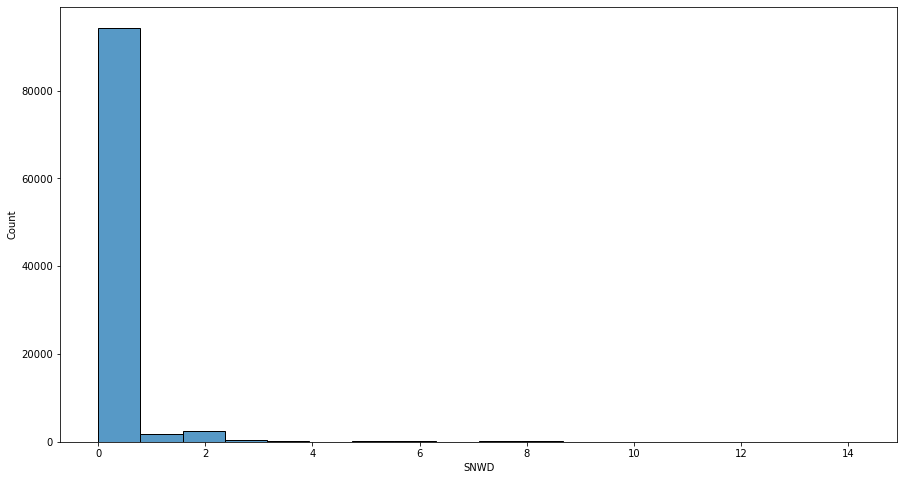

In [22]:
plt.figure(figsize = (15,8))
sns.histplot(data.SNWD)
pass

In [23]:
data['SNWD'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.0
0.010    0.0
0.050    0.0
0.100    0.0
0.500    0.0
0.900    0.0
0.950    1.2
0.990    3.1
0.995    5.9
Name: SNWD, dtype: float64

99.5% значений SNWD не превышают величины 5.9, при этом максимальные значения признака могут достигать значения 14.

In [24]:
rows_to_drop = data[
    ((data['PRCP'] > data['PRCP'].quantile(0.995)) | 
    (data['SNOW']  > data['SNOW' ].quantile(0.995)) |
     (data['SNWD'] > data['SNWD'].quantile(0.995)))].index
data_new = data.drop(rows_to_drop)
data_new.shape

(98399, 25)

In [25]:
rows_to_drop

Int64Index([  225,   226,   227,   228,   229,   230,   231,   232,   233,
              234,
            ...
            99554, 99555, 99556, 99557, 99558, 99559, 99560, 99561, 99562,
            99563],
           dtype='int64', length=1388)

## 4. Обработка категориальных признаков
Пропущенных значений в датасете нет, перейдем сразу к обработке категориальных признаков

In [26]:
data_new["DEP_BLOCK"].nunique()

6

У признака DEP_BLOCK всего 6 уникальных значений и это строковый тип, обрабатывать его будем как категориальный признак

In [27]:
data_new["CARRIER_NAME"].nunique()

17

In [28]:
data_new["DEPARTING_AIRPORT"].nunique()

87

In [29]:
data_new["PREVIOUS_AIRPORT"].nunique()

326

У признаков CARRIER_NAME и DEPARTING_AIRPORT уникальных значений много, но их мы все равно бинаризируем. Признак PREVIOUS_AIRPORT, наверное, лучше дропнуть, там сотни уникальных значений.

In [30]:
DepBlock_dummies = pd.get_dummies(data_new['DEP_BLOCK'])

DepBlock_dummies.head()

,AFTERNOON,EARLY_MORNING,EVENING,LATE_NIGHT,MIDDAY,MORNING
0,0,1,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1


In [31]:
Carrier_dummies = pd.get_dummies(data_new['CARRIER_NAME'])

Carrier_dummies.head()

,Alaska Airlines Inc.,Allegiant Air,American Airlines Inc.,American Eagle Airlines Inc.,Atlantic Southeast Airlines,Comair Inc.,Delta Air Lines Inc.,Endeavor Air Inc.,Frontier Airlines Inc.,Hawaiian Airlines Inc.,JetBlue Airways,Mesa Airlines Inc.,"Midwest Airline, Inc.",SkyWest Airlines Inc.,Southwest Airlines Co.,Spirit Air Lines,United Air Lines Inc.
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [32]:
DepPort_dummies = pd.get_dummies(data_new['DEPARTING_AIRPORT'])

DepPort_dummies.head()

,Albuquerque International Sunport,Atlanta Municipal,Austin - Bergstrom International,Birmingham Airport,Boise Air Terminal,Bradley International,Charleston International,Chicago Midway International,Chicago O'Hare International,Cincinnati/Northern Kentucky International,...,Standiford Field,Stapleton International,Tampa International,Theodore Francis Green State,Truax Field,Tucson International,Tulsa International,Washington Dulles International,Will Rogers World,William P Hobby
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
data_new = pd.concat((data_new, DepBlock_dummies), axis=1)
data_new = data_new.drop(['DEP_BLOCK'], axis=1)
data_new.head()

,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,SNOW,SNWD,TMAX,AWND,AFTERNOON,EARLY_MORNING,EVENING,LATE_NIGHT,MIDDAY,MORNING
0,1,0,1,1,8,99,American Airlines Inc.,5021,75591,868,...,0.0,0.0,67.0,5.37,0,1,0,0,0,0
1,1,0,3,1,49,143,Southwest Airlines Co.,5021,107849,746,...,0.0,0.0,67.0,5.37,0,0,0,0,0,1
2,1,0,2,1,49,143,Southwest Airlines Co.,5021,107849,746,...,0.0,0.0,67.0,5.37,0,0,0,0,0,1
3,1,0,2,1,49,191,Delta Air Lines Inc.,5021,80026,857,...,0.0,0.0,67.0,5.37,0,0,0,0,0,1
4,1,0,10,1,49,142,United Air Lines Inc.,5021,48104,346,...,0.0,0.0,67.0,5.37,0,0,0,0,0,1


In [34]:
data_new = pd.concat((data_new, Carrier_dummies), axis=1)
data_new = data_new.drop(['CARRIER_NAME'], axis=1)
data_new.head()

,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,...,Endeavor Air Inc.,Frontier Airlines Inc.,Hawaiian Airlines Inc.,JetBlue Airways,Mesa Airlines Inc.,"Midwest Airline, Inc.",SkyWest Airlines Inc.,Southwest Airlines Co.,Spirit Air Lines,United Air Lines Inc.
0,1,0,1,1,8,99,5021,75591,868,99113,...,0,0,0,0,0,0,0,0,0,0
1,1,0,3,1,49,143,5021,107849,746,99113,...,0,0,0,0,0,0,0,1,0,0
2,1,0,2,1,49,143,5021,107849,746,99113,...,0,0,0,0,0,0,0,1,0,0
3,1,0,2,1,49,191,5021,80026,857,99113,...,0,0,0,0,0,0,0,0,0,0
4,1,0,10,1,49,142,5021,48104,346,99113,...,0,0,0,0,0,0,0,0,0,1


In [35]:
data_new = pd.concat((data_new, DepPort_dummies), axis=1)
data_new = data_new.drop(['DEPARTING_AIRPORT'], axis=1)
data_new.head()

,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,...,Standiford Field,Stapleton International,Tampa International,Theodore Francis Green State,Truax Field,Tucson International,Tulsa International,Washington Dulles International,Will Rogers World,William P Hobby
0,1,0,1,1,8,99,5021,75591,868,99113,...,0,0,0,0,0,0,0,0,0,0
1,1,0,3,1,49,143,5021,107849,746,99113,...,0,0,0,0,0,0,0,0,0,0
2,1,0,2,1,49,143,5021,107849,746,99113,...,0,0,0,0,0,0,0,0,0,0
3,1,0,2,1,49,191,5021,80026,857,99113,...,0,0,0,0,0,0,0,0,0,0
4,1,0,10,1,49,142,5021,48104,346,99113,...,0,0,0,0,0,0,0,0,0,0


In [36]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98399 entries, 0 to 99786
Columns: 132 entries, DAY_OF_WEEK to William P Hobby
dtypes: float64(9), int64(12), object(1), uint8(110)
memory usage: 27.6+ MB


Категориальные признаки мы успешно обработали

## 5. Нормализация данных

Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать. Выполним стандартизацию численных признаков.

In [37]:
data_numerical = data_new.select_dtypes(include=np.number)
data_numerical.describe()

,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,...,Standiford Field,Stapleton International,Tampa International,Theodore Francis Green State,Truax Field,Tucson International,Tulsa International,Washington Dulles International,Will Rogers World,William P Hobby
count,98399.000000,98399.000000,98399.000000,98399.000000,98399.000000,98399.000000,98399.000000,98399.000000,98399.000000,98399.000000,...,98399.000000,98399.000000,98399.000000,98399.000000,98399.000000,98399.000000,98399.000000,98399.000000,98399.000000,98399.000000
mean,3.941514,0.135398,3.828311,2.983882,89.406569,134.099615,12508.265734,60919.344282,3329.789774,307140.157187,...,0.004065,0.040366,0.014766,0.003333,0.001839,0.003303,0.002581,0.010539,0.003730,0.010041
std,1.907025,0.342150,2.348591,1.718043,65.162130,47.075560,8475.148342,32992.709539,4063.130158,211741.100969,...,0.063629,0.196818,0.120617,0.057639,0.042850,0.057376,0.050741,0.102116,0.060958,0.099700
min,1.000000,0.000000,1.000000,1.000000,1.000000,44.000000,1103.000000,7018.000000,1.000000,13584.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000,2.000000,36.000000,90.000000,5021.000000,24691.000000,640.000000,127411.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,3.000000,3.000000,77.000000,143.000000,11479.000000,69699.000000,2084.000000,320589.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,0.000000,5.000000,4.000000,124.000000,173.000000,17680.000000,80026.000000,4681.000000,416815.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.000000,1.000000,11.000000,14.000000,286.000000,337.000000,32102.000000,107849.000000,19461.000000,816174.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
data_numerical = data_numerical.drop(['DEP_DEL15'], axis=1)
data_numerical.describe()

,DAY_OF_WEEK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,...,Standiford Field,Stapleton International,Tampa International,Theodore Francis Green State,Truax Field,Tucson International,Tulsa International,Washington Dulles International,Will Rogers World,William P Hobby
count,98399.000000,98399.000000,98399.000000,98399.000000,98399.000000,98399.000000,98399.000000,98399.000000,98399.000000,9.839900e+04,...,98399.000000,98399.000000,98399.000000,98399.000000,98399.000000,98399.000000,98399.000000,98399.000000,98399.000000,98399.000000
mean,3.941514,3.828311,2.983882,89.406569,134.099615,12508.265734,60919.344282,3329.789774,307140.157187,1.454794e+06,...,0.004065,0.040366,0.014766,0.003333,0.001839,0.003303,0.002581,0.010539,0.003730,0.010041
std,1.907025,2.348591,1.718043,65.162130,47.075560,8475.148342,32992.709539,4063.130158,211741.100969,9.336721e+05,...,0.063629,0.196818,0.120617,0.057639,0.042850,0.057376,0.050741,0.102116,0.060958,0.099700
min,1.000000,1.000000,1.000000,1.000000,44.000000,1103.000000,7018.000000,1.000000,13584.000000,1.050860e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,36.000000,90.000000,5021.000000,24691.000000,640.000000,127411.000000,5.350680e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,3.000000,3.000000,77.000000,143.000000,11479.000000,69699.000000,2084.000000,320589.000000,1.539321e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,5.000000,4.000000,124.000000,173.000000,17680.000000,80026.000000,4681.000000,416815.000000,2.338195e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.000000,11.000000,14.000000,286.000000,337.000000,32102.000000,107849.000000,19461.000000,816174.000000,2.447530e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [40]:
data_numerical.describe()

,DAY_OF_WEEK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,...,Standiford Field,Stapleton International,Tampa International,Theodore Francis Green State,Truax Field,Tucson International,Tulsa International,Washington Dulles International,Will Rogers World,William P Hobby
count,9.839900e+04,9.839900e+04,9.839900e+04,9.839900e+04,9.839900e+04,9.839900e+04,9.839900e+04,9.839900e+04,9.839900e+04,9.839900e+04,...,9.839900e+04,9.839900e+04,9.839900e+04,9.839900e+04,9.839900e+04,9.839900e+04,9.839900e+04,9.839900e+04,9.839900e+04,9.839900e+04
mean,-3.925615e-14,-3.497920e-15,-1.993205e-15,-2.080635e-14,-1.041838e-15,-1.750763e-14,1.167178e-14,1.299663e-14,9.232633e-14,-1.143911e-15,...,-9.054002e-14,-9.688799e-14,-6.247743e-14,1.489808e-15,-2.459185e-14,3.814727e-14,-8.286722e-15,-2.411807e-14,-2.147085e-14,2.770423e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.542462e+00,-1.204259e+00,-1.154734e+00,-1.356717e+00,-1.913936e+00,-1.345731e+00,-1.633735e+00,-8.192673e-01,-1.386392e+00,-1.445591e+00,...,-6.388766e-02,-2.050946e-01,-1.224237e-01,-5.783149e-02,-4.292809e-02,-5.756553e-02,-5.087220e-02,-1.032030e-01,-6.118527e-02,-1.007099e-01
25%,-1.018085e+00,-7.784716e-01,-5.726761e-01,-8.195952e-01,-9.367836e-01,-8.834377e-01,-1.098071e+00,-6.619994e-01,-8.488156e-01,-9.850627e-01,...,-6.388766e-02,-2.050946e-01,-1.224237e-01,-5.783149e-02,-4.292809e-02,-5.756553e-02,-5.087220e-02,-1.032030e-01,-6.118527e-02,-1.007099e-01
50%,3.066890e-02,-3.526844e-01,9.381636e-03,-1.903954e-01,1.890659e-01,-1.214452e-01,2.661090e-01,-3.066084e-01,6.351550e-02,9.053220e-02,...,-6.388766e-02,-2.050946e-01,-1.224237e-01,-5.783149e-02,-4.292809e-02,-5.756553e-02,-5.087220e-02,-1.032030e-01,-6.118527e-02,-1.007099e-01
75%,5.550458e-01,4.988901e-01,5.914394e-01,5.308824e-01,8.263393e-01,6.102235e-01,5.791175e-01,3.325540e-01,5.179667e-01,9.461580e-01,...,-6.388766e-02,-2.050946e-01,-1.224237e-01,-5.783149e-02,-4.292809e-02,-5.756553e-02,-5.087220e-02,-1.032030e-01,-6.118527e-02,-1.007099e-01
max,1.603800e+00,3.053613e+00,6.412017e+00,3.016989e+00,4.310100e+00,2.311905e+00,1.422425e+00,3.970144e+00,2.404039e+00,1.063260e+00,...,1.565232e+01,4.875748e+00,8.168267e+00,1.729144e+01,2.329454e+01,1.737133e+01,1.965690e+01,9.689540e+00,1.634364e+01,9.929407e+00


In [41]:
final_data = pd.concat((data_numerical, data_new['PREVIOUS_AIRPORT'], data_new['DEP_DEL15']), axis = 1)

In [42]:
final_data.shape

(98399, 132)

In [43]:
final_data.describe()

,DAY_OF_WEEK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,...,Stapleton International,Tampa International,Theodore Francis Green State,Truax Field,Tucson International,Tulsa International,Washington Dulles International,Will Rogers World,William P Hobby,DEP_DEL15
count,9.839900e+04,9.839900e+04,9.839900e+04,9.839900e+04,9.839900e+04,9.839900e+04,9.839900e+04,9.839900e+04,9.839900e+04,9.839900e+04,...,9.839900e+04,9.839900e+04,9.839900e+04,9.839900e+04,9.839900e+04,9.839900e+04,9.839900e+04,9.839900e+04,9.839900e+04,98399.000000
mean,-3.925615e-14,-3.497920e-15,-1.993205e-15,-2.080635e-14,-1.041838e-15,-1.750763e-14,1.167178e-14,1.299663e-14,9.232633e-14,-1.143911e-15,...,-9.688799e-14,-6.247743e-14,1.489808e-15,-2.459185e-14,3.814727e-14,-8.286722e-15,-2.411807e-14,-2.147085e-14,2.770423e-15,0.135398
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.342150
min,-1.542462e+00,-1.204259e+00,-1.154734e+00,-1.356717e+00,-1.913936e+00,-1.345731e+00,-1.633735e+00,-8.192673e-01,-1.386392e+00,-1.445591e+00,...,-2.050946e-01,-1.224237e-01,-5.783149e-02,-4.292809e-02,-5.756553e-02,-5.087220e-02,-1.032030e-01,-6.118527e-02,-1.007099e-01,0.000000
25%,-1.018085e+00,-7.784716e-01,-5.726761e-01,-8.195952e-01,-9.367836e-01,-8.834377e-01,-1.098071e+00,-6.619994e-01,-8.488156e-01,-9.850627e-01,...,-2.050946e-01,-1.224237e-01,-5.783149e-02,-4.292809e-02,-5.756553e-02,-5.087220e-02,-1.032030e-01,-6.118527e-02,-1.007099e-01,0.000000
50%,3.066890e-02,-3.526844e-01,9.381636e-03,-1.903954e-01,1.890659e-01,-1.214452e-01,2.661090e-01,-3.066084e-01,6.351550e-02,9.053220e-02,...,-2.050946e-01,-1.224237e-01,-5.783149e-02,-4.292809e-02,-5.756553e-02,-5.087220e-02,-1.032030e-01,-6.118527e-02,-1.007099e-01,0.000000
75%,5.550458e-01,4.988901e-01,5.914394e-01,5.308824e-01,8.263393e-01,6.102235e-01,5.791175e-01,3.325540e-01,5.179667e-01,9.461580e-01,...,-2.050946e-01,-1.224237e-01,-5.783149e-02,-4.292809e-02,-5.756553e-02,-5.087220e-02,-1.032030e-01,-6.118527e-02,-1.007099e-01,0.000000
max,1.603800e+00,3.053613e+00,6.412017e+00,3.016989e+00,4.310100e+00,2.311905e+00,1.422425e+00,3.970144e+00,2.404039e+00,1.063260e+00,...,4.875748e+00,8.168267e+00,1.729144e+01,2.329454e+01,1.737133e+01,1.965690e+01,9.689540e+00,1.634364e+01,9.929407e+00,1.000000


In [44]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98399 entries, 0 to 99786
Columns: 132 entries, DAY_OF_WEEK to DEP_DEL15
dtypes: float64(130), int64(1), object(1)
memory usage: 99.8+ MB


## 6. Отбор признаков и классификация методом kNN

Для предсказания задержек будем использовать все входные признаки, кроме PREVIOUS_AIRPORT, этот признак не сильно важен, и это категориальный признак с сотнями уникальных значений.

In [45]:
final_data.columns

Index(['DAY_OF_WEEK', 'DISTANCE_GROUP', 'SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS',
       'NUMBER_OF_SEATS', 'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH',
       'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT',
       'AVG_MONTHLY_PASS_AIRLINE',
       ...
       'Tampa International', 'Theodore Francis Green State', 'Truax Field',
       'Tucson International', 'Tulsa International',
       'Washington Dulles International', 'Will Rogers World',
       'William P Hobby', 'PREVIOUS_AIRPORT', 'DEP_DEL15'],
      dtype='object', length=132)

In [46]:
X = final_data.drop(['DEP_DEL15', 'PREVIOUS_AIRPORT'], axis=1)
y = final_data['DEP_DEL15']

Проведем feature selection при помощи SelectKBest, возьмем 15 параметров.

In [47]:
from sklearn.feature_selection import SelectKBest, f_classif

X_new = SelectKBest(f_classif, k=15).fit_transform(X, y)
X_new.shape

(98399, 15)

In [48]:
X_new.dtype.names

Данные в исходной выборке несбалансированы, и классификатор просто будет классифицировать все объекты как принадлежащие к самому часто встречаемому классу. Чтобы этой ситуации избежать, возьмем равное число элементов из каждого класса.

In [49]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_train_miss, y_train_miss = nm.fit_resample(X_new, y.ravel())

print('После применения метода кол-во меток со значением True: {}'.format(sum(y_train_miss == True)))
print('После применения метода кол-во меток со значением False: {}'.format(sum(y_train_miss == False)))

После применения метода кол-во меток со значением True: 13323
После применения метода кол-во меток со значением False: 13323


Мы взяли тестовую выборку как 1/4 исходного сэмпла, а тренировочную - как 3/4.

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_train_miss, y_train_miss, test_size = 0.25, random_state = 17) 
nm = NearMiss()
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(19984, 6662)

Создадим модель метода ближайших соседей с числом соседей = 10, потренируем ее.

In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

Выведем ошибку на тренировочной выборке

In [52]:
y_train_predict = knn.predict(X_train)
err_test_1  = np.mean(y_train  != y_train_predict)
err_test_1

0.20536429143314652

In [53]:
final_data.shape

(98399, 132)

Выведем ошибку на тестовой выборке

In [54]:
y_test_predict = knn.predict(X_test)
err_test_2  = np.mean(y_test  != y_test_predict)
err_test_2

0.22876013209246474

In [55]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_predict, y_test))

[[3101 1234]
 [ 290 2037]]


Глядя на матрицу рассогласований, можно отметить большое число ошибок типа FP, оно в ~3 раза больше числа ошибок FN. Можно предположить, что объекты одного класса ведут себя предсказуемо, объекты другого класса более случайны и непредсказуемы. 

Сравним с результатами, полученными на данных со всех признаков.

In [56]:
nm = NearMiss()
X_train_miss, y_train_miss = nm.fit_resample(X, y.ravel())
X_train, X_test, y_train, y_test = train_test_split(X_train_miss, y_train_miss, test_size = 0.25, random_state = 17) 
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
err_test_1  = np.mean(y_train  != y_train_predict)
y_test_predict = knn.predict(X_test)
err_test_2  = np.mean(y_test  != y_test_predict)
err_test_1, err_test_2

(0.2484987990392314, 0.2721404983488442)

Заметно увеличение точности на тестовой выборке на ~5% 

Повторим эти шаги с разным числом соседей

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

nnb = [1, 5, 10, 20, 30, 50, 100]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=5, verbose=3)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.646 total time=   0.6s
[CV 2/5] END .....................n_neighbors=1;, score=0.653 total time=   0.7s
[CV 3/5] END .....................n_neighbors=1;, score=0.658 total time=   0.6s
[CV 4/5] END .....................n_neighbors=1;, score=0.649 total time=   0.6s
[CV 5/5] END .....................n_neighbors=1;, score=0.647 total time=   0.6s
[CV 1/5] END .....................n_neighbors=5;, score=0.719 total time=   0.9s
[CV 2/5] END .....................n_neighbors=5;, score=0.709 total time=   1.0s
[CV 3/5] END .....................n_neighbors=5;, score=0.714 total time=   1.0s
[CV 4/5] END .....................n_neighbors=5;, score=0.710 total time=   1.0s
[CV 5/5] END .....................n_neighbors=5;, score=0.717 total time=   1.0s
[CV 1/5] END ....................n_neighbors=10;, score=0.720 total time=   0.9s
[CV 2/5] END ....................n_neighbors=10;,

Оптимальным числом соседей является число 5.
Ошибка получилась ~28.6%

Попробуем позапускать другие модели классификации

## 7. Классификация другими способами

### 1. Нейронная полносвязная сеть

Попробуем просто запустить нашу нейронную сеть без подбора параметров

In [58]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(alpha = 1,
                          hidden_layer_sizes = (40,),
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          max_iter=2000,
                          random_state = 17)

In [59]:
%%time
mlp_model.fit(X_train, y_train)

Wall time: 18.7 s


MLPClassifier(activation='logistic', alpha=1, hidden_layer_sizes=(40,),
              max_iter=2000, random_state=17, solver='lbfgs')

In [60]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

Выведем ошибки на тренировочной и тестовой выборках.

In [61]:
print(np.mean(y_train!= y_train_pred), np.mean(y_test != y_test_pred))

0.14191353082465974 0.27679375562894026


Теперь попробуем подобрать гиперпараметры.
Сначала попробуем подобрать число нейронов.

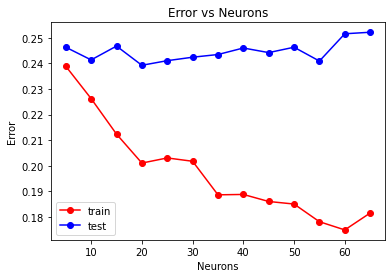

In [62]:
neur_arr = np.arange(5, 70, 5)
train_err = [] 
test_err = []

for neur in neur_arr:
    mlp_model = MLPClassifier(hidden_layer_sizes = (neur,),
                          max_iter=2000,
                          random_state = 17)
    mlp_model.fit(X_train, y_train)
    
    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

plt.plot(neur_arr, train_err, 'r-o', label = 'train')
plt.plot(neur_arr, test_err, 'b-o', label = 'test')
plt.title('Error vs Neurons')
plt.xlabel('Neurons')
plt.ylabel('Error')
plt.legend()

In [63]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.17493995196156925 0.23926748724106875


In [64]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_predict, y_test))

[[3050 1472]
 [ 341 1799]]


In [65]:
neur_opt = neur_arr[test_err == min_test_err][0]
print(neur_opt)

20


20 - оптимальное число нейронов на каждом слое. Точность на обучающей выборке продолжает улучшаться с ростом числа нейронов, но происходит переобучение, и после 20 нейронов точность на тестовой выборке начинает ухудшаться.

Теперь попробуем подобрать оптимальное alpha.

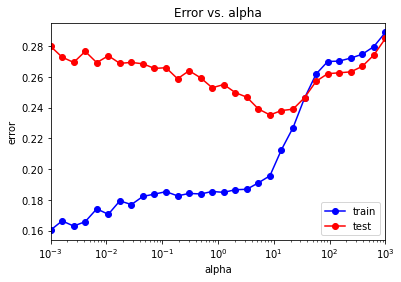

In [66]:
from sklearn.metrics import accuracy_score
alpha_arr = np.logspace(-3,3, 30)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (20,), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=2000, random_state = 17)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

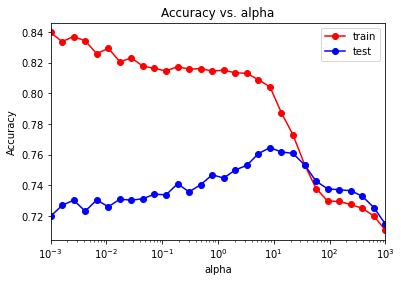

In [67]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

In [68]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.16027822257806246 0.2353647553287301


In [69]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_predict, y_test))

[[3050 1472]
 [ 341 1799]]


In [70]:
alpha_opt = alpha_arr[test_err == min_test_err][0]
print(alpha_opt)

8.531678524172806


При очень малых значениях alpha точность немного колеблется, но в целом стабильна. Точность на обучающей выборке немного улучшается при уменьшении alpha, точность на тестовой выборке немного ухудшается. При больших alpha мы слишком сильно упрощаем модель, точность падает как на test, так и на train. Оптимальным будет значение alpha ~8.5, при таком значении alpha минимизируется ошибка на тестовой выборке.  
После того, как мы подобрали параметры, у нас получилась наилучшая точность в 23.5%, близкая к той, что получилась в методе kNN.

**Random Forest**

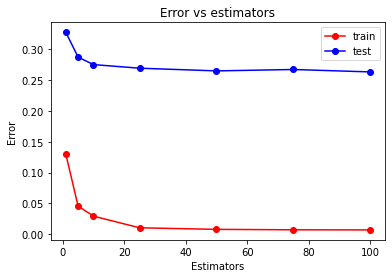

In [71]:
est_arr = np.array([1, 5, 10, 25, 50, 75, 100])
train_err = [] 
test_err = []

for est in est_arr:
    rf = ensemble.RandomForestClassifier(n_estimators = est)
    rf.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

plt.plot(est_arr, train_err, 'r-o', label = 'train')
plt.plot(est_arr, test_err, 'b-o', label = 'test')
plt.title('Error vs estimators')
plt.xlabel('Estimators')
plt.ylabel('Error')
plt.legend()

In [72]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.007205764611689352 0.26313419393575505


**AdaBoost**

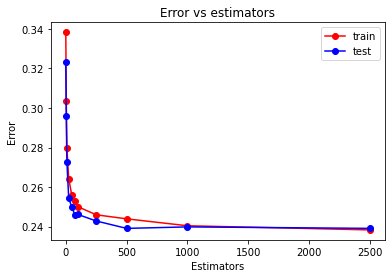

In [86]:
est_arr = np.array([1, 5, 10, 25, 50, 75, 100, 250, 500, 1000, 2500])
train_err = [] 
test_err = []

for est in est_arr:
    ada = ensemble.AdaBoostClassifier(n_estimators = est)
    ada.fit(X_train, y_train)

    y_train_pred = ada.predict(X_train)
    y_test_pred = ada.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

plt.plot(est_arr, train_err, 'r-o', label = 'train')
plt.plot(est_arr, test_err, 'b-o', label = 'test')
plt.title('Error vs estimators')
plt.xlabel('Estimators')
plt.ylabel('Error')
plt.legend()

In [87]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.23834067253803043 0.23911738216751727


**Gradient Boosting**

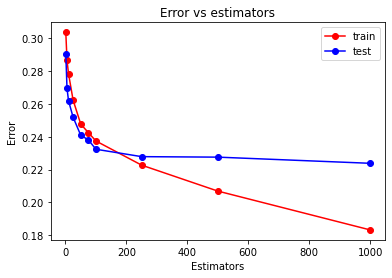

In [82]:
est_arr = np.array([1, 5, 10, 25, 50, 75, 100, 250, 500, 1000])
train_err = [] 
test_err = []

for est in est_arr:
    gbt = ensemble.GradientBoostingClassifier(n_estimators = est)
    gbt.fit(X_train, y_train)

    y_train_pred = gbt.predict(X_train)
    y_test_pred = gbt.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

plt.plot(est_arr, train_err, 'r-o', label = 'train')
plt.plot(est_arr, test_err, 'b-o', label = 'test')
plt.title('Error vs estimators')
plt.xlabel('Estimators')
plt.ylabel('Error')
plt.legend()

In [83]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.18319655724579664 0.2238066646652657


Точности получили не слишком сильно отличающиеся от уже найденных. Можно отметить высокую точность RF на тренировочной выборке.
Самые лучшие точности на тестовых выборках получились в Gradient boosting, нейронных сетях и Ada boosting.

## 8. Выводы

В рамках проделанной работы была выполнена задача классификации авиарейсов по факту задержки на основании данных из датасета. Данные из датасета были прочитаны, исследованы, визуализированы.  
Была выполнена предобработка входных данных: были исключены выбросы, были бинаризированы категориальные признаки, были нормализованы численные признаки. В задаче число объектов разных классов было несбалансировано, и классификаторы просто относили все объекты к самому часто встречаемому классу, с этим приходилось бороться. Так как размер исходной выборки был очень большим, проблема была решена сокращением числа объектов самого часто встречаемого класса.  
В исходной выборке было большое число признаков объектов, некоторые из них сильно коррелировали, другие были просто не слишком полезны при попытках классифицировать объекты и вызывали переобучение. Лишние признаки были выброшены при помощи SelectKBest по величине F ANOVA value. Это позволило улучшить точность kNN классификатора на тестовой выборке на ~5%, отбрасывание лишних признаков является одной из мер против переобучения.
Обработанные данные были разделены на тренировочные и тестовые, на этих данных запускался классификатор ближайших соседей с разными параметрами. Было обнаружено, что для нашего датасета оптимальным числом ближайших соседей является 5. Сам классификатор работал с достаточно хорошей точностью в ~77.1%. 
Кроме kNN, были эксперименты с другими моделями: с двухслойной нейронной сетью, Random Forest, Ada Boost, Gradien Boosting.  
На нейронной сети при оптимальных параметрах alpha = ~8.5, число нейронов = 20 была получена точность в 76.5%.